<a href="https://colab.research.google.com/github/aizazaziz/aizazaziz/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [114]:
df = pd.read_csv("housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [115]:
df.dropna(inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [117]:
from sklearn.model_selection import train_test_split

X = df.drop(["median_house_value"], axis = 1)
y = df["median_house_value"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
train_data = X_train.join(y_train)

In [120]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15152,-117.05,33.01,17.0,3430.0,425.0,1468.0,433.0,10.6186,<1H OCEAN,429300.0
7502,-118.26,33.91,44.0,892.0,139.0,440.0,159.0,2.8859,<1H OCEAN,120800.0
6702,-118.13,34.13,39.0,2099.0,397.0,1500.0,380.0,4.8304,<1H OCEAN,493200.0
11745,-121.14,38.77,15.0,10282.0,1333.0,3868.0,1300.0,6.4789,INLAND,287800.0
13149,-121.37,36.89,21.0,2471.0,473.0,1753.0,451.0,4.0250,INLAND,293800.0
...,...,...,...,...,...,...,...,...,...,...
874,-122.03,37.56,31.0,4981.0,964.0,2841.0,924.0,4.8962,NEAR BAY,220200.0
3054,-119.34,35.60,33.0,2143.0,488.0,1732.0,509.0,1.9362,INLAND,59000.0
3088,-118.23,35.48,17.0,2354.0,514.0,775.0,380.0,1.8369,INLAND,59400.0
17125,-122.12,37.45,38.0,1276.0,314.0,955.0,287.0,2.0096,NEAR BAY,155700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

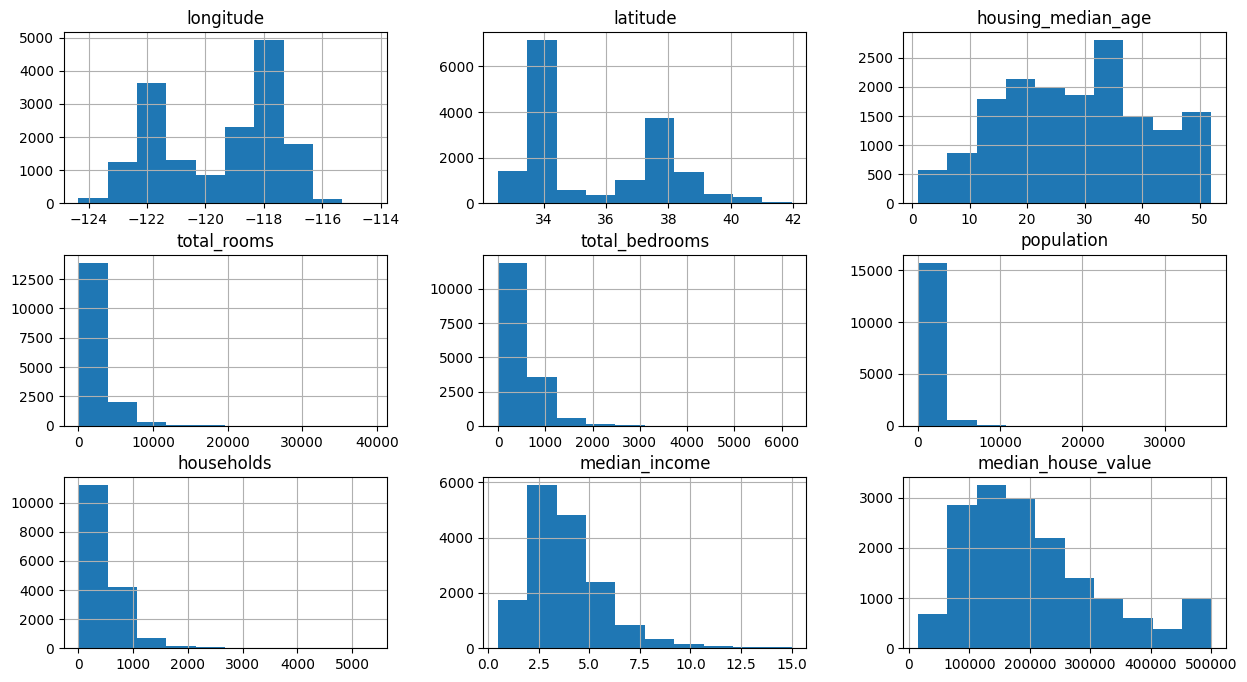

In [121]:
train_data.hist(figsize=(15, 8))

<Axes: >

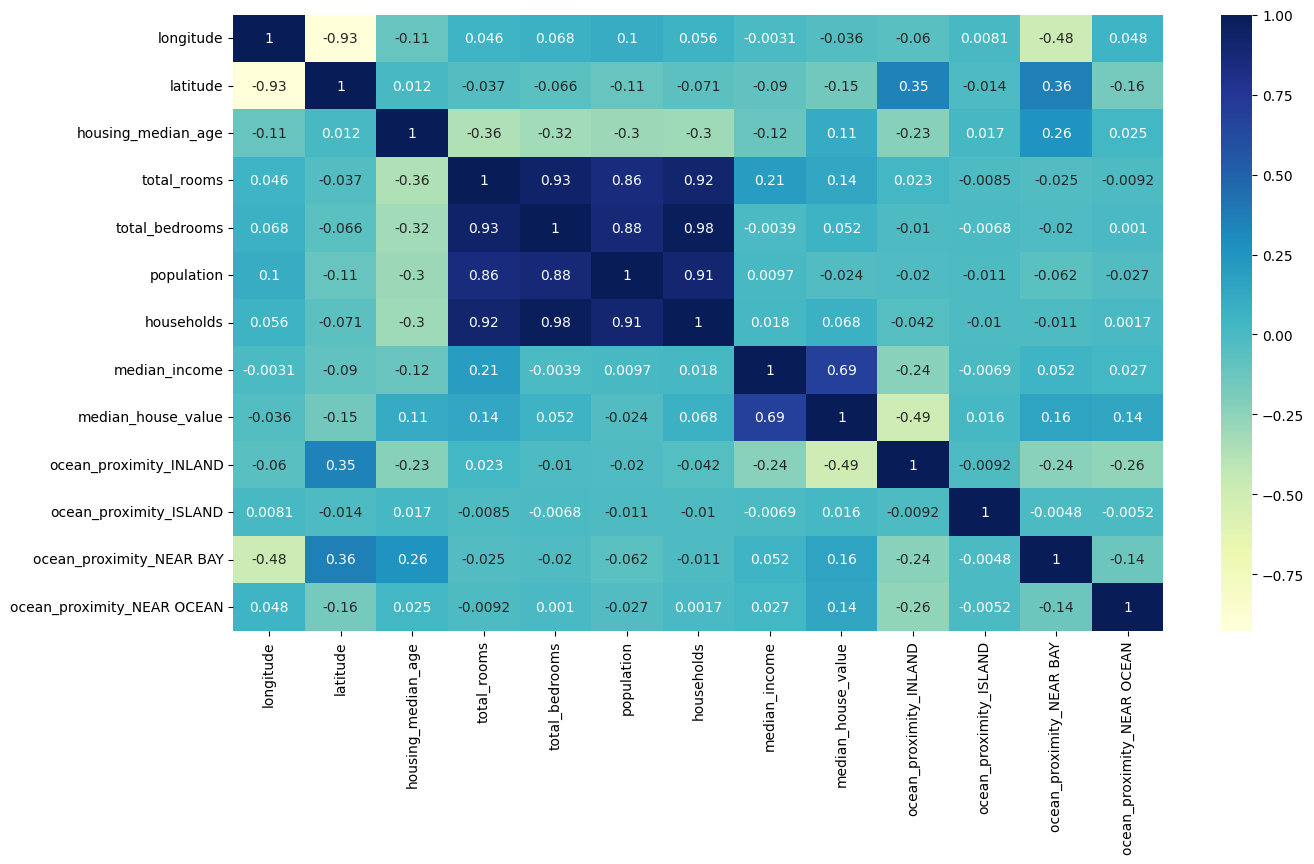

In [122]:
train_data_encoded = pd.get_dummies(train_data, columns=['ocean_proximity'], drop_first=True)

plt.figure(figsize=(15, 8))
sns.heatmap(train_data_encoded.corr(), annot = True, cmap ="YlGnBu" )

In [123]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [124]:
train_data =train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(["ocean_proximity"], axis=1)

In [125]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15152,-117.05,33.01,17.0,8.140607,6.054439,7.292337,6.073045,10.6186,429300.0,1,0,0,0,0
7502,-118.26,33.91,44.0,6.794587,4.941642,6.089045,5.075174,2.8859,120800.0,1,0,0,0,0
6702,-118.13,34.13,39.0,7.649693,5.986452,7.313887,5.942799,4.8304,493200.0,1,0,0,0,0
11745,-121.14,38.77,15.0,9.238247,7.195937,8.260751,7.170888,6.4789,287800.0,0,1,0,0,0
13149,-121.37,36.89,21.0,7.812783,6.161207,7.469654,6.113682,4.0250,293800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,-122.03,37.56,31.0,8.513587,6.872128,7.952263,6.829794,4.8962,220200.0,0,0,0,1,0
3054,-119.34,35.60,33.0,7.670429,6.192362,7.457609,6.234411,1.9362,59000.0,0,1,0,0,0
3088,-118.23,35.48,17.0,7.764296,6.244167,6.654153,5.942799,1.8369,59400.0,0,1,0,0,0
17125,-122.12,37.45,38.0,7.152269,5.752573,6.862758,5.662960,2.0096,155700.0,0,0,0,1,0


<Axes: >

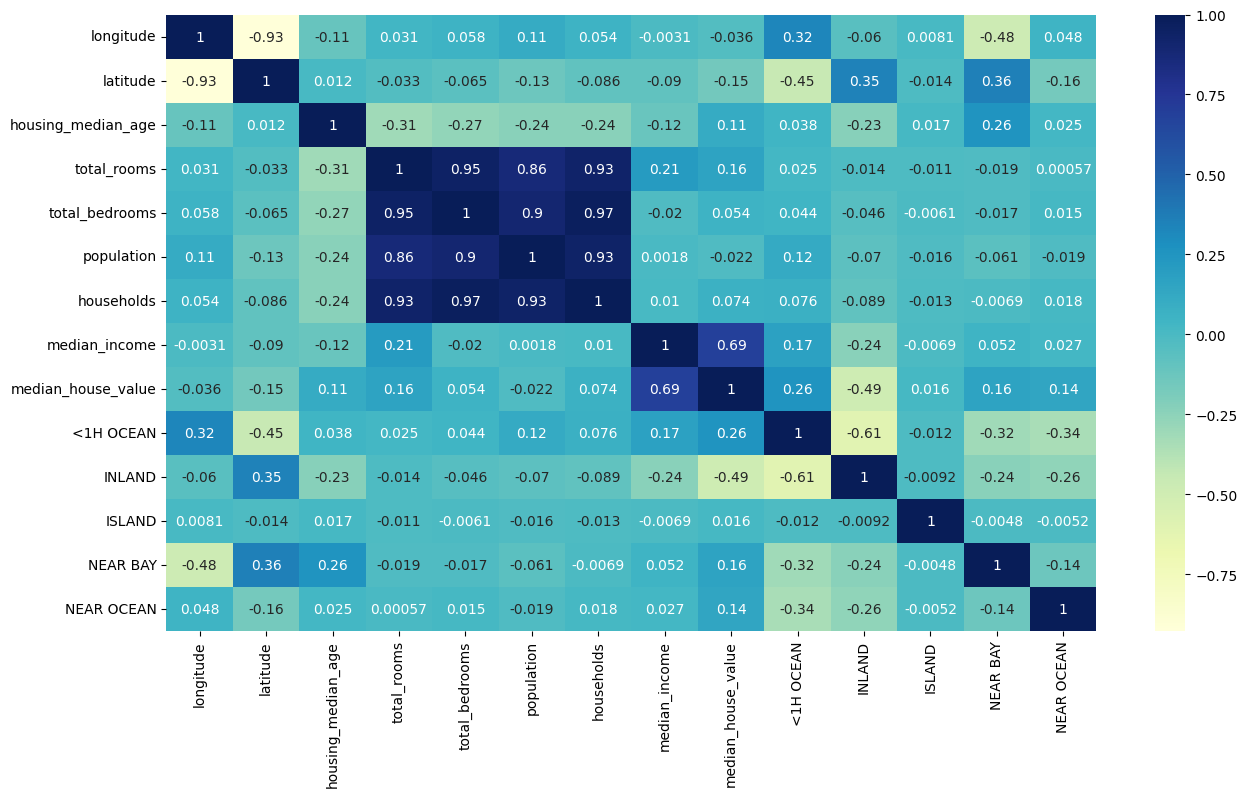

In [126]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap= "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

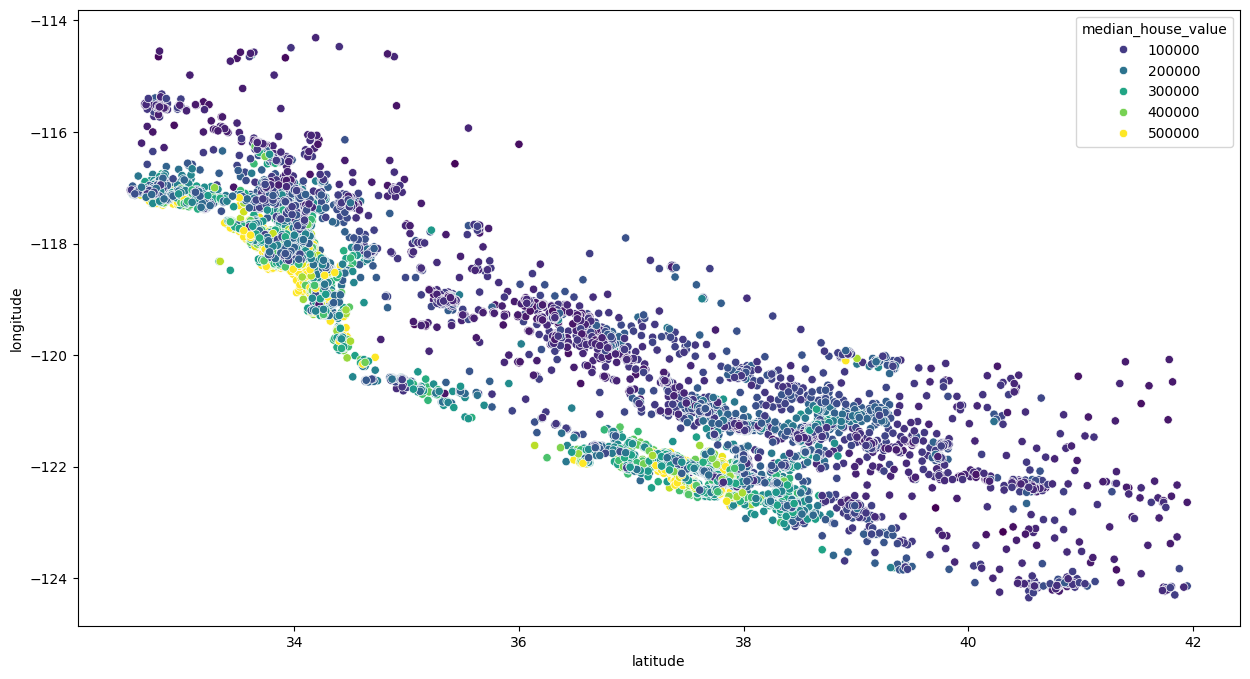

In [127]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y= "longitude", data= train_data, hue="median_house_value", palette="viridis")

In [128]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/ train_data["total_rooms"]
train_data["household_rooms"]= train_data["total_rooms"]/ train_data["households"]


<Axes: >

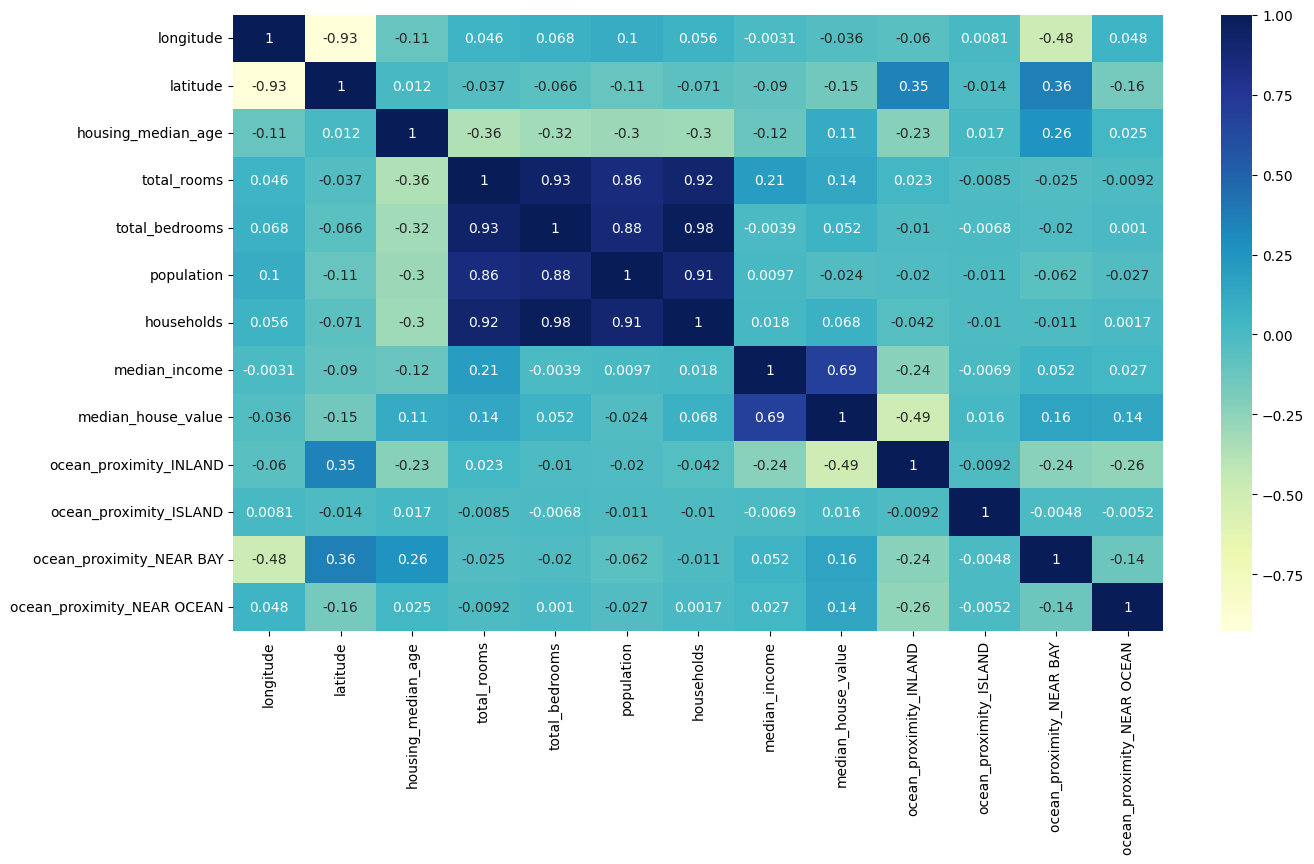

In [129]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_encoded.corr(), annot=True, cmap= "YlGnBu")

In [130]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [131]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/ test_data["total_rooms"]
test_data["household_rooms"]= test_data["total_rooms"]/ test_data["households"]



In [132]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [133]:
reg.score(X_test, y_test)

0.658250115048606

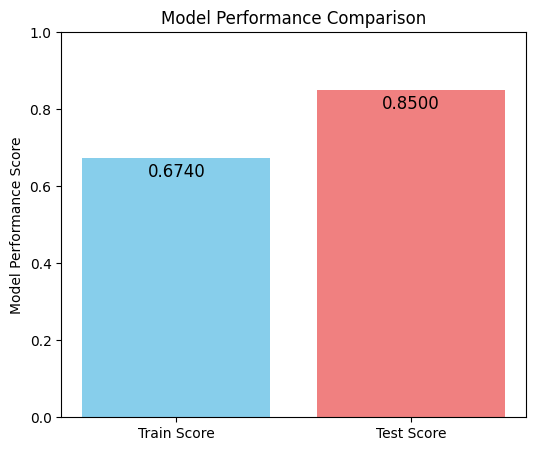

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate both scores (you will need X_test and y_test for a real scenario)
train_score = reg.score(X_train, y_train)
# For example purposes, let's assume a test score
test_score = 0.85 # forest.score(X_test, y_test)

scores = [train_score, test_score]
labels = ['Train Score', 'Test Score']

plt.figure(figsize=(6, 5))
plt.bar(labels, scores, color=['skyblue', 'lightcoral'])

plt.ylim(0, 1.0) # Set Y-axis to the standard range for a score
plt.ylabel("Model Performance Score")
plt.title("Model Performance Comparison")

# Add the exact value on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score - 0.05, f'{score:.4f}', ha='center', color='black', fontsize=12)

plt.show()

In [135]:
from sklearn.ensemble import  RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
forest.score(X_test, y_test)

0.8089360254308839

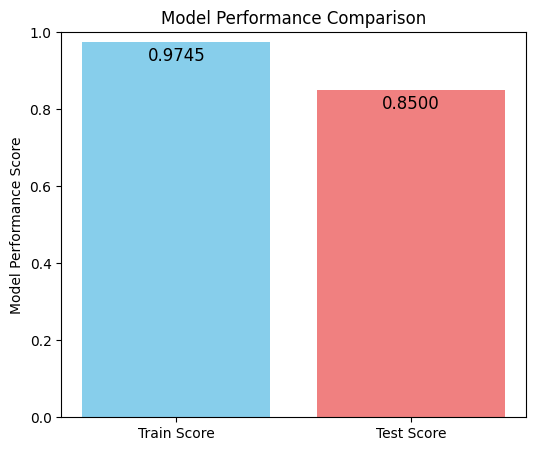

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate both scores (you will need X_test and y_test for a real scenario)
train_score = forest.score(X_train, y_train)
# For example purposes, let's assume a test score
test_score = 0.85 # forest.score(X_test, y_test)

scores = [train_score, test_score]
labels = ['Train Score', 'Test Score']

plt.figure(figsize=(6, 5))
plt.bar(labels, scores, color=['skyblue', 'lightcoral'])

plt.ylim(0, 1.0) # Set Y-axis to the standard range for a score
plt.ylabel("Model Performance Score")
plt.title("Model Performance Comparison")

# Add the exact value on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score - 0.05, f'{score:.4f}', ha='center', color='black', fontsize=12)

plt.show()